In [8]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

In [9]:
series = Series.from_csv('sunspots.csv', header=0)
series.head()

YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [10]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Zadanie
Narysuj szereg czasowy

C:\Users\przem85\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


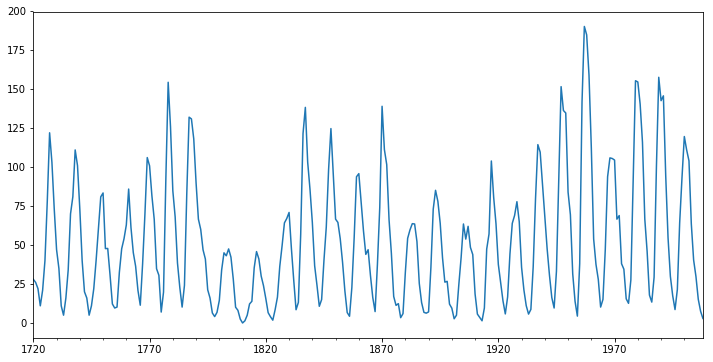

In [11]:
plt.figure(figsize=(12,6));
series.ix['1720':].plot()
plt.show()

In [12]:
series1=series.ix['1720':'1950']
series2=series.ix['1951':'2008']

# AR(1) = ARMA(2,0)

Korzystając z zasady 2, najpierw spróbujemy model ARMA(2,0) z dwoma warunkami autoregresji i bez średnich kroczących.

In [13]:
arma_mod20 = sm.tsa.ARMA(series1, (3,2)).fit()

Wypiszmy parametry modelu

## Wykonajmy predykcję 

In [14]:
predict_sunspots20 = arma_mod20.predict('1951', '2008', dynamic=True)
#print(predict_sunspots20)

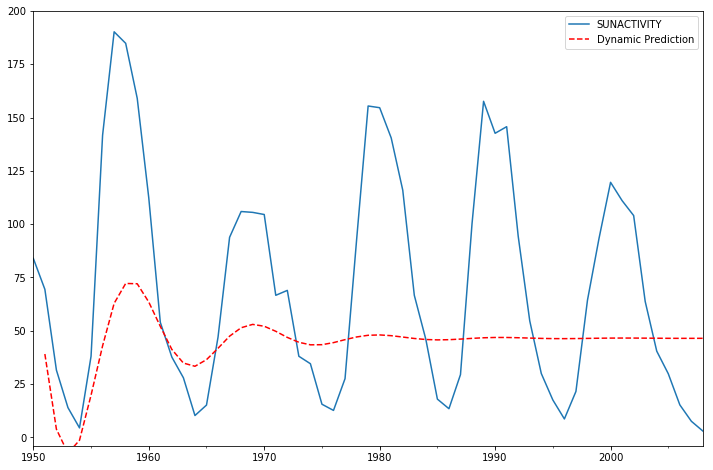

In [15]:
ax = series.ix['1950':].plot(figsize=(12,8))
predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [31]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train = series1
test = series2
history = [x for x in train]
predictions = list()
predictions1 = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    predictions1.append( history[-1] )
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

In [28]:
#predictions
pre=pd.Series(predictions, index=series2.index)

pre1=pd.Series(predictions1, index=series2.index)

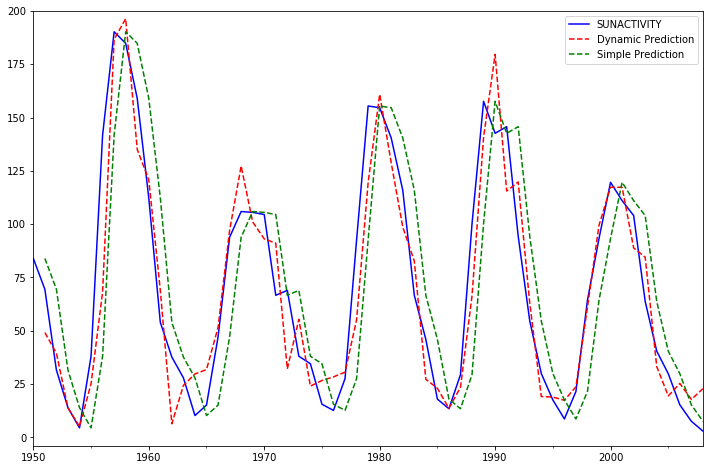

In [30]:
ax = series.ix['1950':].plot(style='b', figsize=(12,8))
pre.plot(ax=ax, style='r--', label='Dynamic Prediction');
pre1.plot(ax=ax, style='g--', label='Simple Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

